In [5]:
import process
import importlib as imp

In [3]:
import numpy as np
import sounddevice as sd

In [4]:
sd.query_devices()

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Microphone (Logitech BRIO), MME (2 in, 0 out)
   2 Microphone (3- Realtek(R) Audio, MME (2 in, 0 out)
   3 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  4 Speakers (3- Realtek(R) Audio), MME (0 in, 8 out)
   5 Realtek Digital Output (3- Real, MME (0 in, 2 out)
   6 Primary Sound Capture Driver, Windows DirectSound (2 in, 0 out)
   7 Microphone (Logitech BRIO), Windows DirectSound (2 in, 0 out)
   8 Microphone (3- Realtek(R) Audio), Windows DirectSound (2 in, 0 out)
   9 Primary Sound Driver, Windows DirectSound (0 in, 2 out)
  10 Speakers (3- Realtek(R) Audio), Windows DirectSound (0 in, 8 out)
  11 Realtek Digital Output (3- Realtek(R) Audio), Windows DirectSound (0 in, 2 out)
  12 ASIO4ALL v2, ASIO (2 in, 8 out)
  13 Realtek Digital Output (3- Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
  14 Speakers (3- Realtek(R) Audio), Windows WASAPI (0 in, 2 out)
  15 Microphone (3- Realtek(R) Audio), Windows WASAPI (2 in, 0

In [43]:
imp.reload(process)

<module 'process' from 'C:\\Users\\Camilo\\acoustic_field\\process.py'>

In [10]:
data=process.time_rec('meme',10)

listo


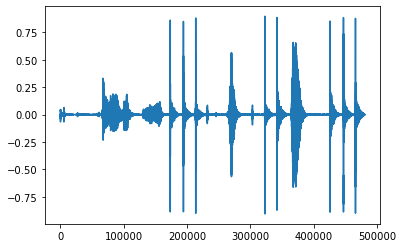

In [11]:
import matplotlib.pyplot as plt
plt.plot(data)

In [46]:
f,t,spec = process.spectrogram(data[:,0],2048,256)

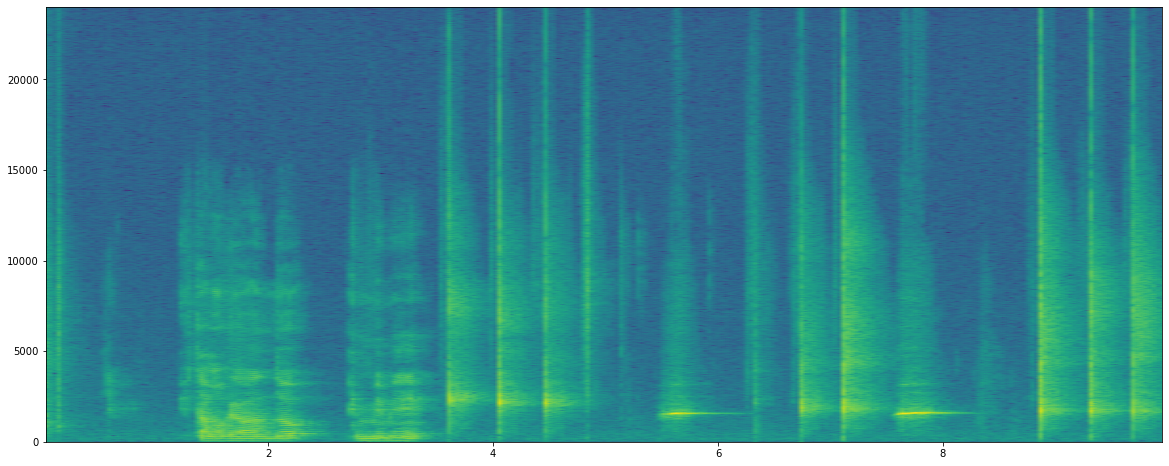

In [49]:
plt.figure(figsize=(20,8))
plt.pcolormesh(t,f,20*np.log10(spec),shading='gouraud');

In [115]:
imp.reload(process)
f,t,spec = process.spectrogram(data[:,0],2048,logf=True)

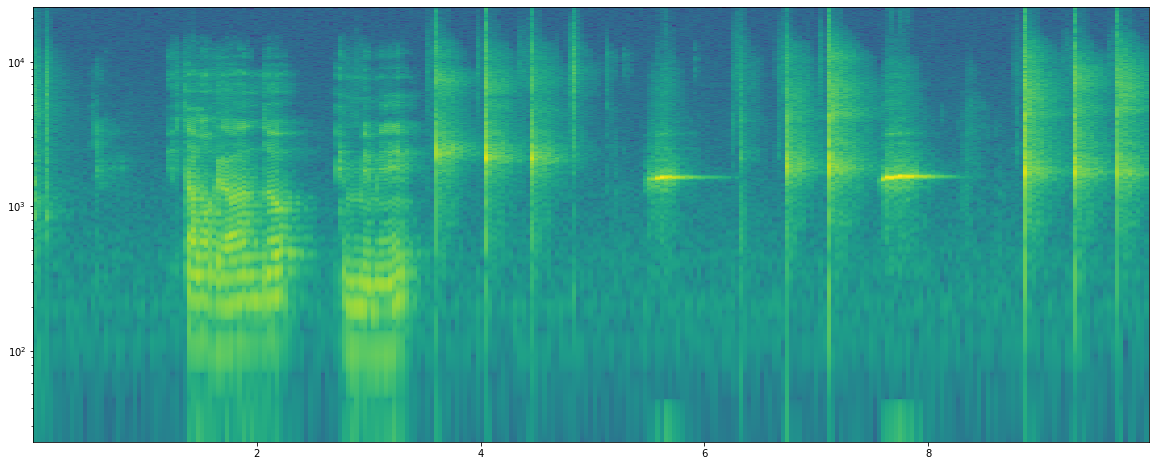

In [117]:
fig, ax = plt.subplots(figsize=(20,8))
ax.pcolormesh(t,f,20*np.log10(spec),shading='auto')
ax.set_yscale('log')